### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever


### Upgrade plotly (only Google Colab Notebook)


In [ ]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 53.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from scipy import stats

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [ ]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv',
                      parse_dates=['date'])

# Preliminary Data Exploration

* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [ ]:
print(df_yearly.shape)
print(df_yearly.columns)
df_yearly.head()

(12, 4)
Index(['year', 'births', 'deaths', 'clinic'], dtype='object')


,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [ ]:
print(df_monthly.shape)
print(df_monthly.columns)
df_monthly.head()

(98, 3)
Index(['date', 'births', 'deaths'], dtype='object')


,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


### Check for Nan Values and Duplicates

In [ ]:
print(df_yearly.isna().sum())
print("")
print(df_monthly.isna().sum())
print("")
print(df_yearly[df_yearly.duplicated()].values.any())
print(df_monthly[df_monthly.duplicated()].values.any())

year      0
births    0
deaths    0
clinic    0
dtype: int64

date      0
births    0
deaths    0
dtype: int64

False
False


In [ ]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


### Descriptive Statistics

In [ ]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [ ]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [ ]:
prob = df_yearly.deaths.sum() / df_yearly.births.sum() * 100
print(f'Chances of dying in the 1840s in Vienna: {prob:.3}%')

Chances of dying in the 1840s in Vienna: 7.08%


# Visualise the Total Number of Births and Deaths over Time

Plot the Monthly Data on Twin Axes
Create a [Matplotlib chart] with twin y-axes.

* Format the x-axis using locators for the years and months
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively.
* Do you notice anything in the late 1840s?

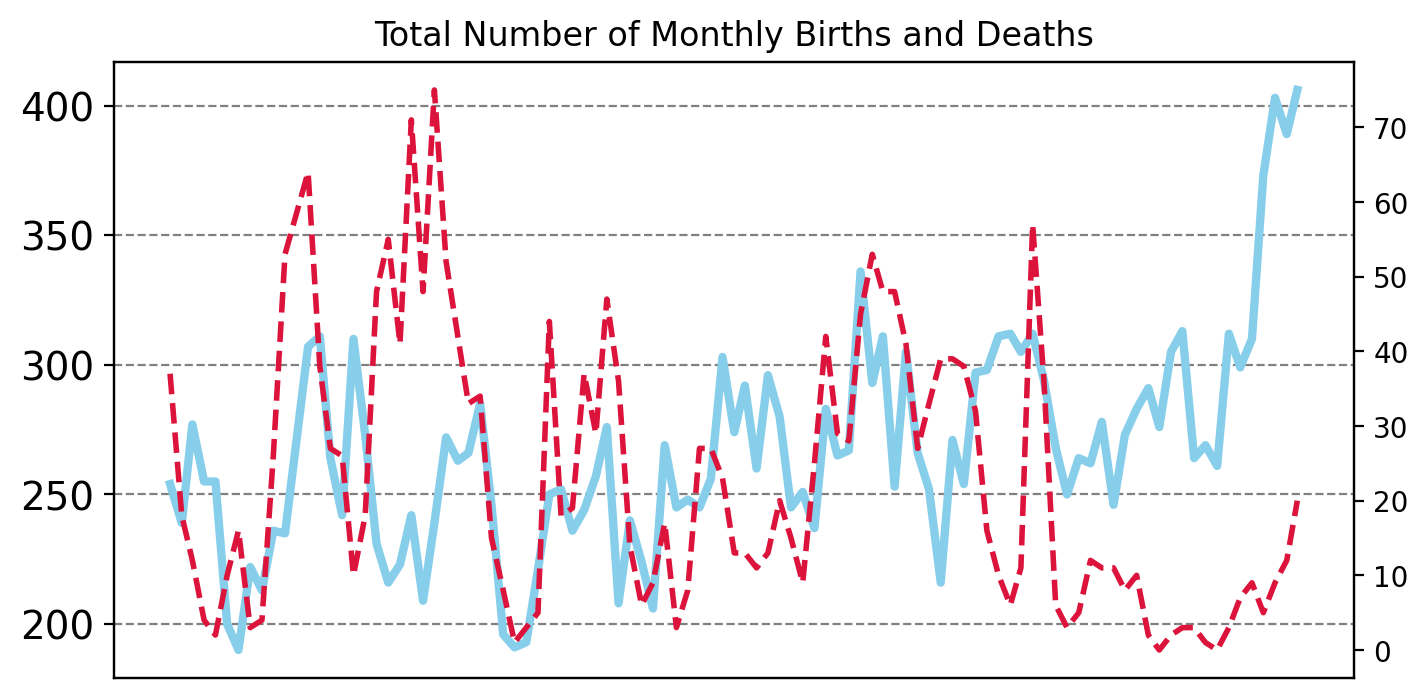

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
plt.title('Total Number of Monthly Births and Deaths')
plt.xticks(ticks=df_monthly.date.dt.month,fontsize=14)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date, df_monthly.births, color='skyblue', linewidth=3)
ax2.plot(df_monthly.date, df_monthly.deaths, color='crimson', linewidth=2, linestyle='--')

plt.show()

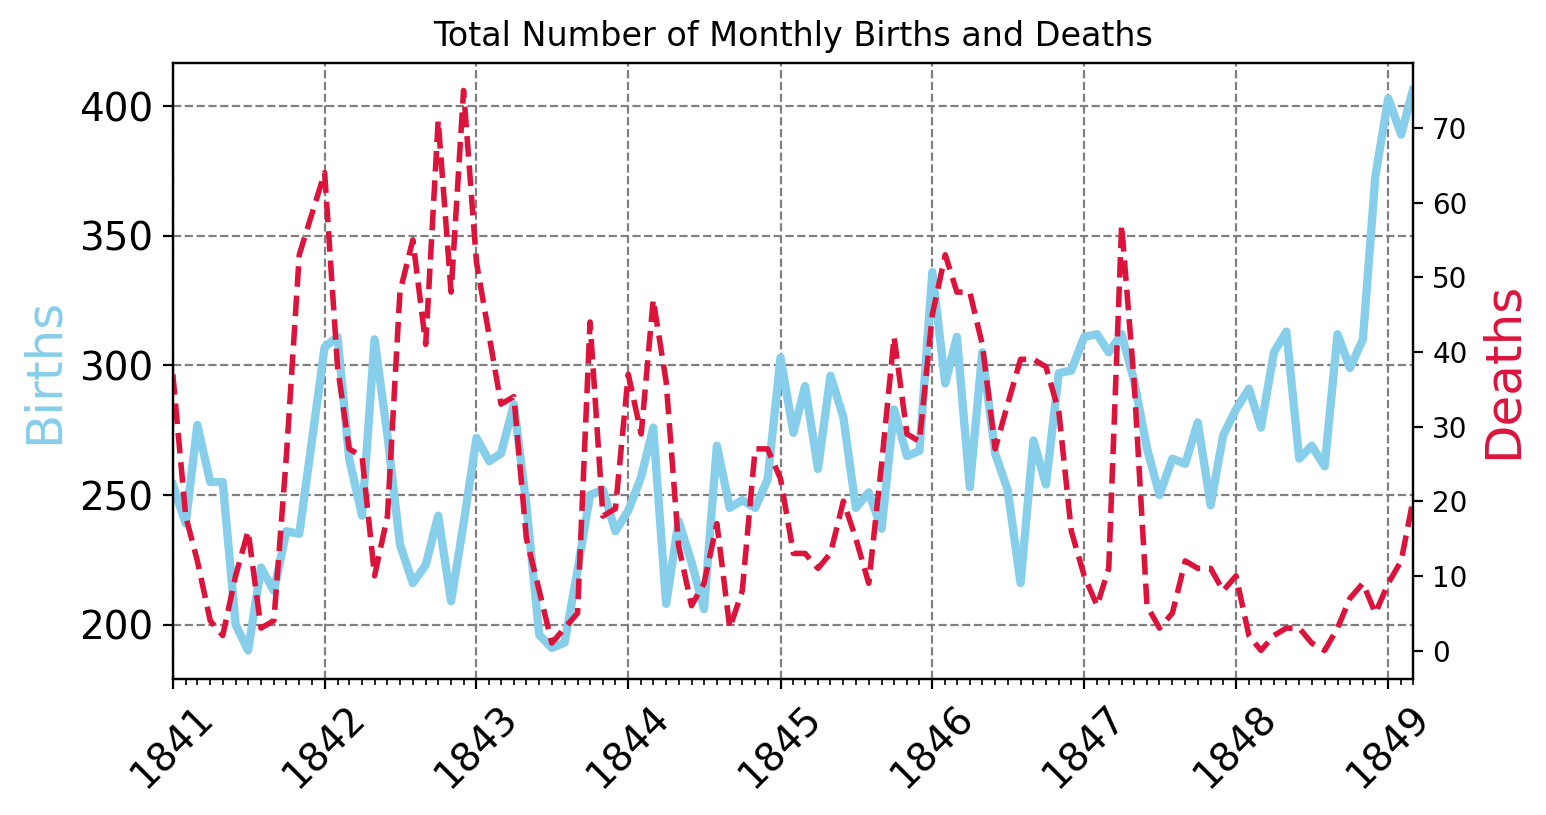

In [ ]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(8,4), dpi=200)
plt.title('Total Number of Monthly Births and Deaths')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('Births', color='skyblue', fontsize=18)
ax2.set_ylabel('Deaths', color='crimson', fontsize=18)

ax1.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_monthly.date, df_monthly.births, color='skyblue', linewidth=3)
ax2.plot(df_monthly.date, df_monthly.deaths, color='crimson', linewidth=2, linestyle='--')

plt.show()

# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [ ]:
line = px.line(df_yearly,
               x='year',
               y='births',
               color='clinic')

line.show()

In [ ]:
line_2 = px.line(df_yearly,
               x='year',
               y='deaths',
               color='clinic')

line_2.show()

### Calculate the Proportion of Deaths at Each Clinic

Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [ ]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births * 100

In [ ]:
clinic_1 = df_yearly[df_yearly.clinic == 'clinic 1']
avg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() * 100
print(f'Average death rate in clinic 1 is {avg_c1:.3}%')

clinic_2 = df_yearly[df_yearly.clinic == 'clinic 2']
avg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() * 100
print(f'Average death rate in clinic 2 is {avg_c2:.3}%')

Average death rate in clinic 1 is 9.92%
Average death rate in clinic 2 is 3.88%


### Plotting the Proportion of Yearly Deaths by Clinic

In [ ]:
line = px.line(df_yearly,
               x='year',
               y='pct_deaths',
               color='clinic')
line.show()

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1847. In fact, he ordered people to wash their hands with clorine (instead of water).

In [ ]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')


* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1847.
* Calculate the average death rate after June 1847.

In [ ]:
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births

after_handwashing = df_monthly[df_monthly.date >= handwashing_start]
before_handwashing = df_monthly[df_monthly.date < handwashing_start]

In [ ]:
avg_after_h = after_handwashing.deaths.sum() / after_handwashing.births.sum() * 100
avg_before_h = before_handwashing.deaths.sum() / before_handwashing.births.sum() * 100

print(f'The average of deaths after 1847-06-01 is: {avg_after_h:.3}%')
print(f'The average of deaths before 1847-06-01 is: {avg_before_h:.4}%')

The average of deaths after 1847-06-01 is: 2.15%
The average of deaths before 1847-06-01 is: 10.53%


### Calculate a Rolling Average of the Death Rate

Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

In [ ]:
roll_df = before_handwashing.set_index('date')
roll_df = roll_df.rolling(window=6).mean()


In [ ]:
roll_df

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.50,29.00,0.11
1847-02-01,290.50,23.50,0.08
1847-03-01,296.17,18.83,0.07


### Highlighting Subsections of a Line Chart

Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths).

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line.
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers.
* Add a legend

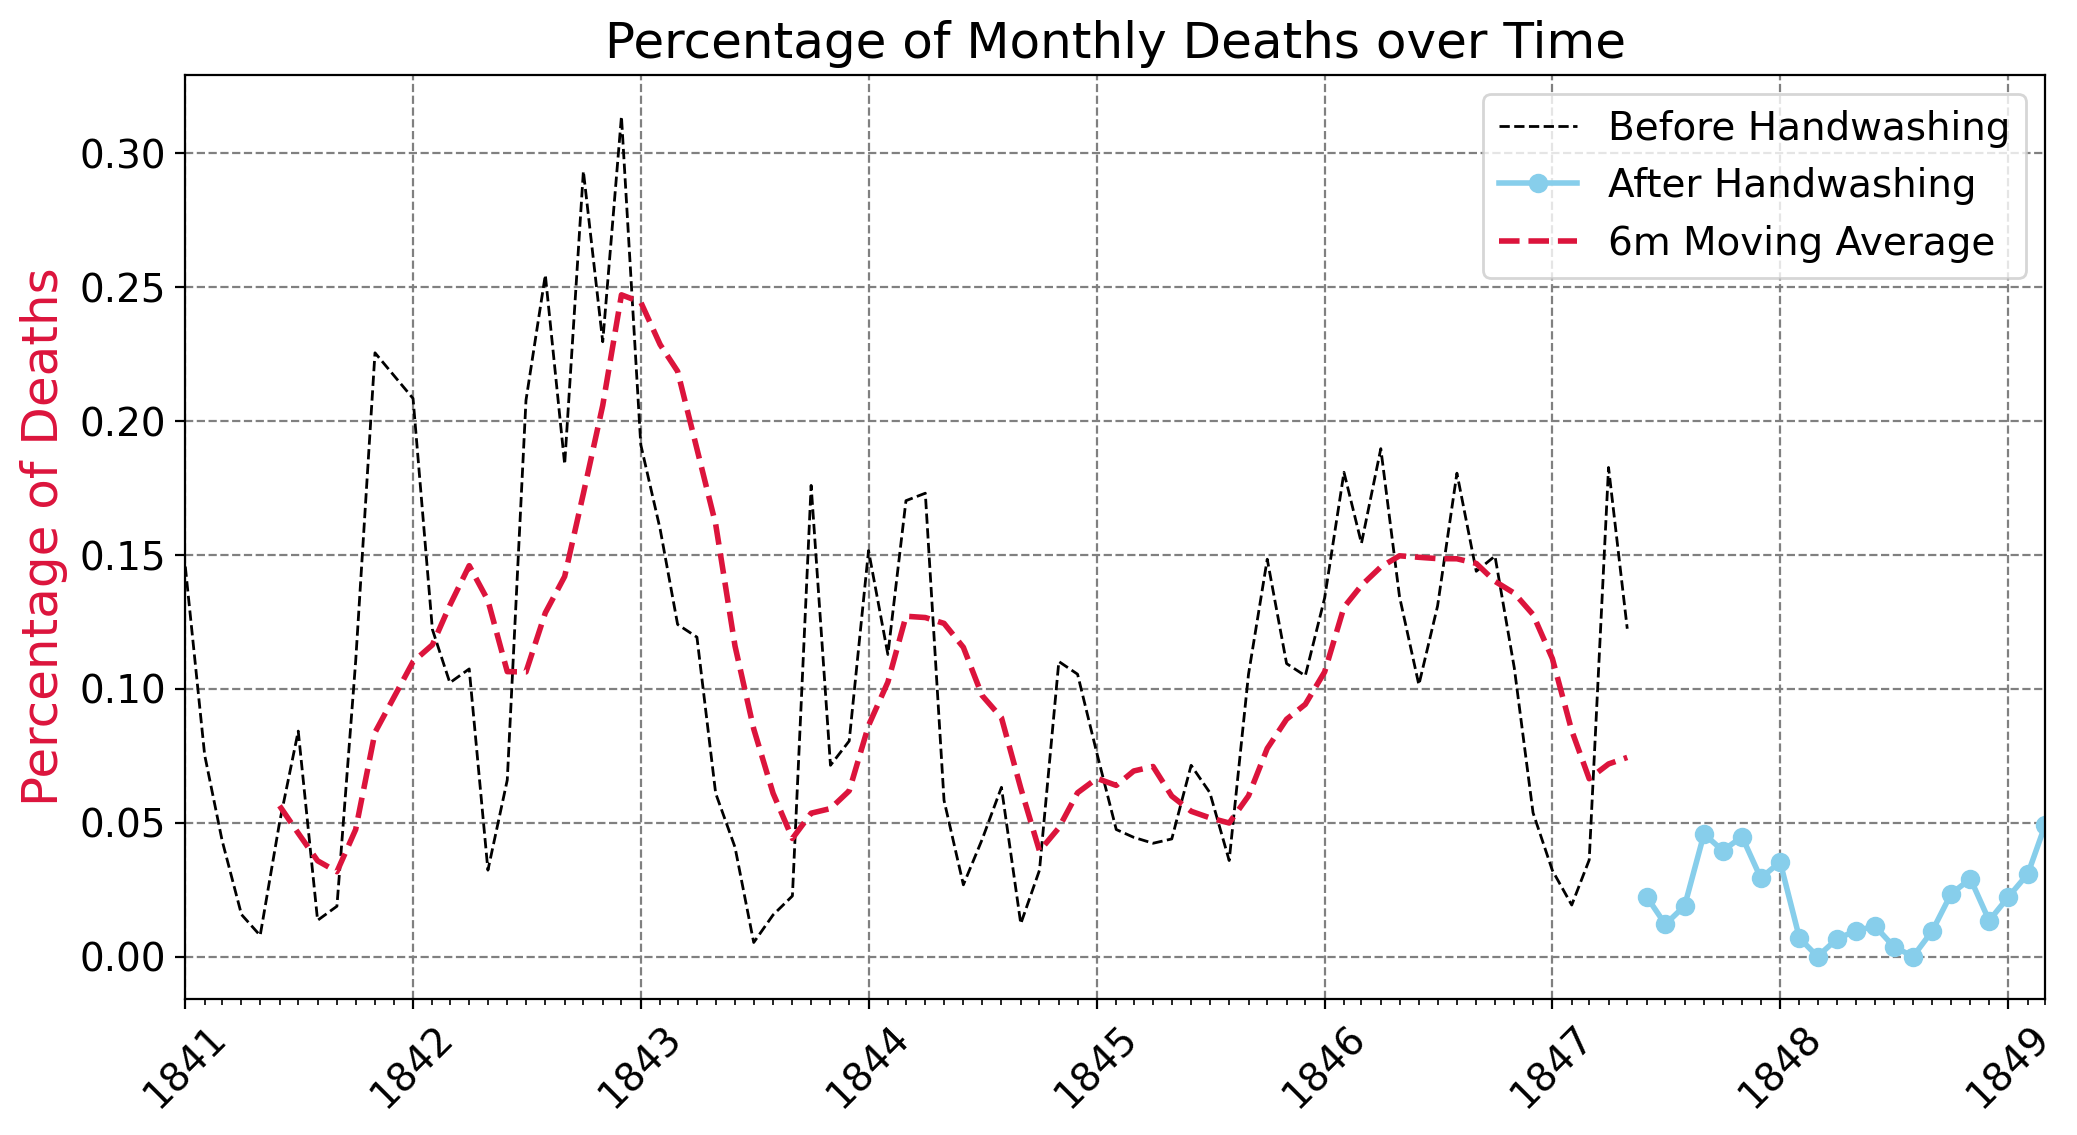

In [ ]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(12,6), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

ax = plt.gca()

ax.set_ylabel('Percentage of Deaths', color='crimson', fontsize=18)

ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])

ax.grid(color='grey', linestyle='--')

ma_line, = plt.plot(before_handwashing.date,
                    before_handwashing.pct_deaths,
                    color='black',
                    linewidth=1,
                    linestyle='--',
                    label='Before Handwashing')

bw_line, = plt.plot(after_handwashing.date,
                    after_handwashing.pct_deaths,
                    color='skyblue',
                    linewidth=2,
                    marker='o',
                    label='After Handwashing')

aw_line, = plt.plot(roll_df.index,
         roll_df.pct_deaths,
         color='crimson',
         linestyle='--',
         linewidth=2,
         label='6m Moving Average')


plt.legend(handles=[ma_line, bw_line, aw_line], fontsize=14)

plt.show()


### Statistics - Calculate the Difference in the Average Monthly Death Rate

* What was the average percentage of monthly deaths before handwashing?
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier?
* How many times lower are the chances of dying after handwashing compared to before?

In [ ]:
print(f'Average percentage of monthly deaths before handwashing: {before_handwashing.pct_deaths.mean() * 100:.4}%')
print(f'Average percentage of monthly deaths after handwashing: {after_handwashing.pct_deaths.mean() * 100:.3}%')
death_pct_reduce = before_handwashing.pct_deaths.mean() * 100 - after_handwashing.pct_deaths.mean() * 100
print(f'handwashing reduce the average chance of dying in childbirth by: {death_pct_reduce:.3}%')
print(f'the chances of dying after handwashing are approximately '
f'{before_handwashing.pct_deaths.mean() / after_handwashing.pct_deaths.mean():.3} times lower compared to before handwashing.')

Average percentage of monthly deaths before handwashing: 10.5%
Average percentage of monthly deaths after handwashing: 2.11%
handwashing reduce the average chance of dying in childbirth by: 8.4%
the chances of dying after handwashing are approximately 4.98 times lower compared to before handwashing.


### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

* Show if a particular date was before or after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing.
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [ ]:
data_before_handwashing = np.where(df_monthly.date < handwashing_start, 'before', 'after')
df_monthly['handwashing'] = data_before_handwashing

In [ ]:
fig = px.box(df_monthly,
               'handwashing',
             'pct_deaths',
             color='handwashing',
             title='How Have the Stats Changed with Handwashing')

fig.update_layout(yaxis_title='Percentage Of Monthly Deaths',
                  xaxis_title='Washing Hands?')

fig.show()

### Use Histograms to Visualise the Monthly Distribution of Outcomes

Create a `plotly histogram` to show the monthly percentage of deaths.

* Display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable.
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Display your box plot on the top of the histogram.

In [ ]:
fig = px.histogram(df_monthly,
                   'pct_deaths',
                   color='handwashing',
                   histnorm='percent',
                   opacity=0.7,
                   nbins=30,
                   marginal='box',
                   barmode='overlay')
fig.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

* Use Seaborn's `.kdeplot()` to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after.

* Use the `shade` parameter to give your two distributions different colours.
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem.


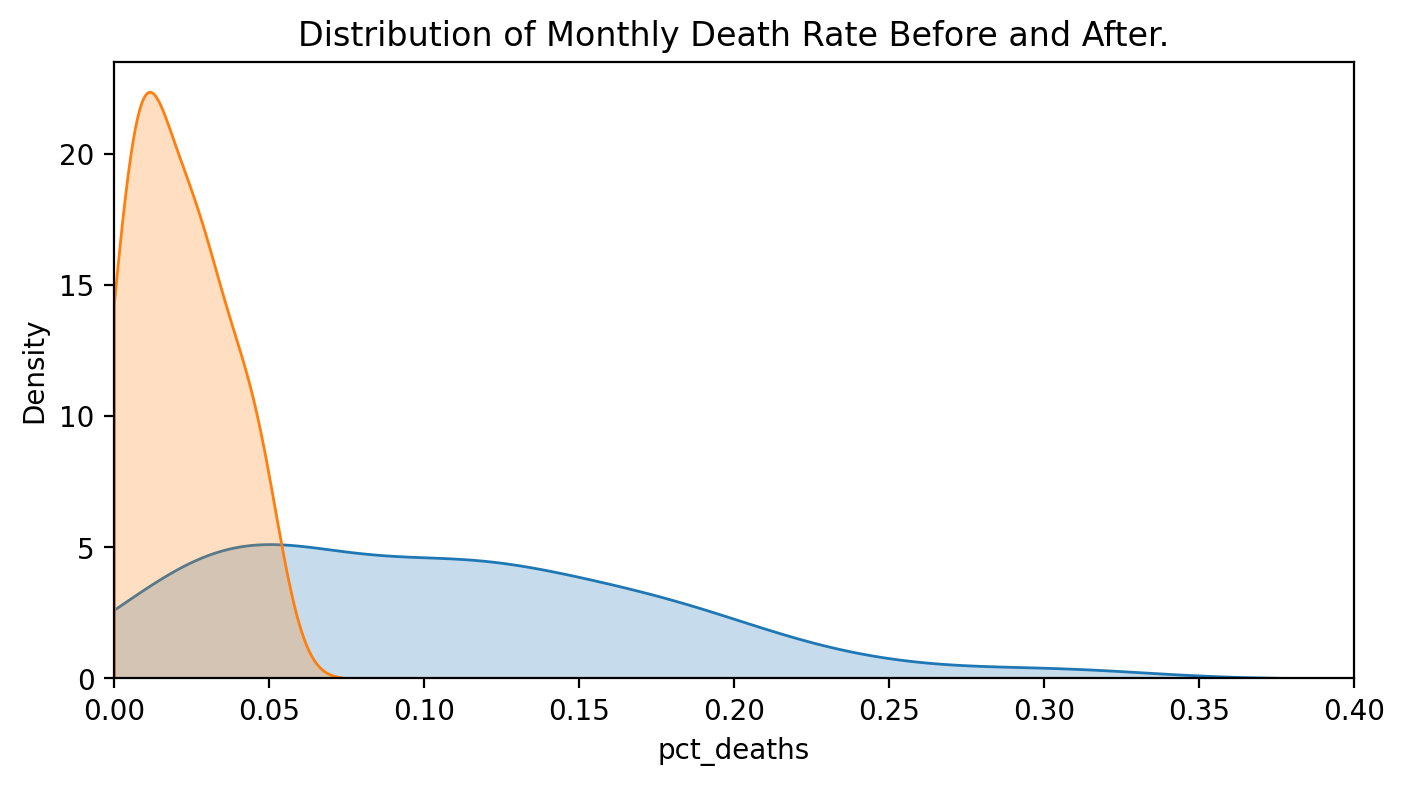

In [ ]:


plt.figure(figsize=(8, 4), dpi=200)
plt.title('Distribution of Monthly Death Rate Before and After.')

sns.kdeplot(data=before_handwashing.pct_deaths, fill=True, clip=(0, 1))
sns.kdeplot(data=after_handwashing.pct_deaths, fill=True, clip=(0, 1))

plt.ylabel('Density')
plt.xlim(0, 0.40)

plt.show()

### Use a T-Test to Show Statistical Significance

Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

* Import `stats` from scipy
* Use the `.ttest_ind()` function to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level?



In [ ]:
t_stat, p_value = stats.ttest_ind(before_handwashing.pct_deaths, after_handwashing.pct_deaths)

In [ ]:
print(f'p_value is {p_value:.10f}')
print(f't_stat is {t_stat:.4f}')

p_value is 0.0000002985
t_stat is 5.5116
